In [3]:
import matplotlib.pyplot as plt
import numpy as np
from random import random
from skimage import io
from glob import glob

In [4]:
_IMGS               = glob("./images/*.jpg")
_IMGS               = [io.imread(_IMG) for _IMG in _IMGS]

# PRINT FUNCTIONS

---

In [5]:
def print_img(img, gray=False, width=10):
    img_ratio = float(img.shape[1]/img.shape[0])

    plt.figure(figsize=(width, width/img_ratio))
    plt.imshow(img, cmap=plt.get_cmap("gray")) if gray else plt.imshow(img)
    plt.colorbar()
    plt.axis('off')
    plt.show()

def print_n_imgs(imgs, titles, gray, title):
    n_imgs = len(imgs)
    fig, ax = plt.subplots(ncols=n_imgs, figsize=(n_imgs*10, 10))
    fig.suptitle(title, fontsize=30)
    fig.tight_layout()
    fig.subplots_adjust(top=0.9)

    for i in range(n_imgs):
        ax[i].imshow(imgs[i], cmap=plt.cm.gray) if gray[i] else ax[i].imshow(imgs[i])
        ax[i].set_title(titles[i])
        ax[i].axis('off')

# IMAGES

---

### CHOOSE THE IMAGE

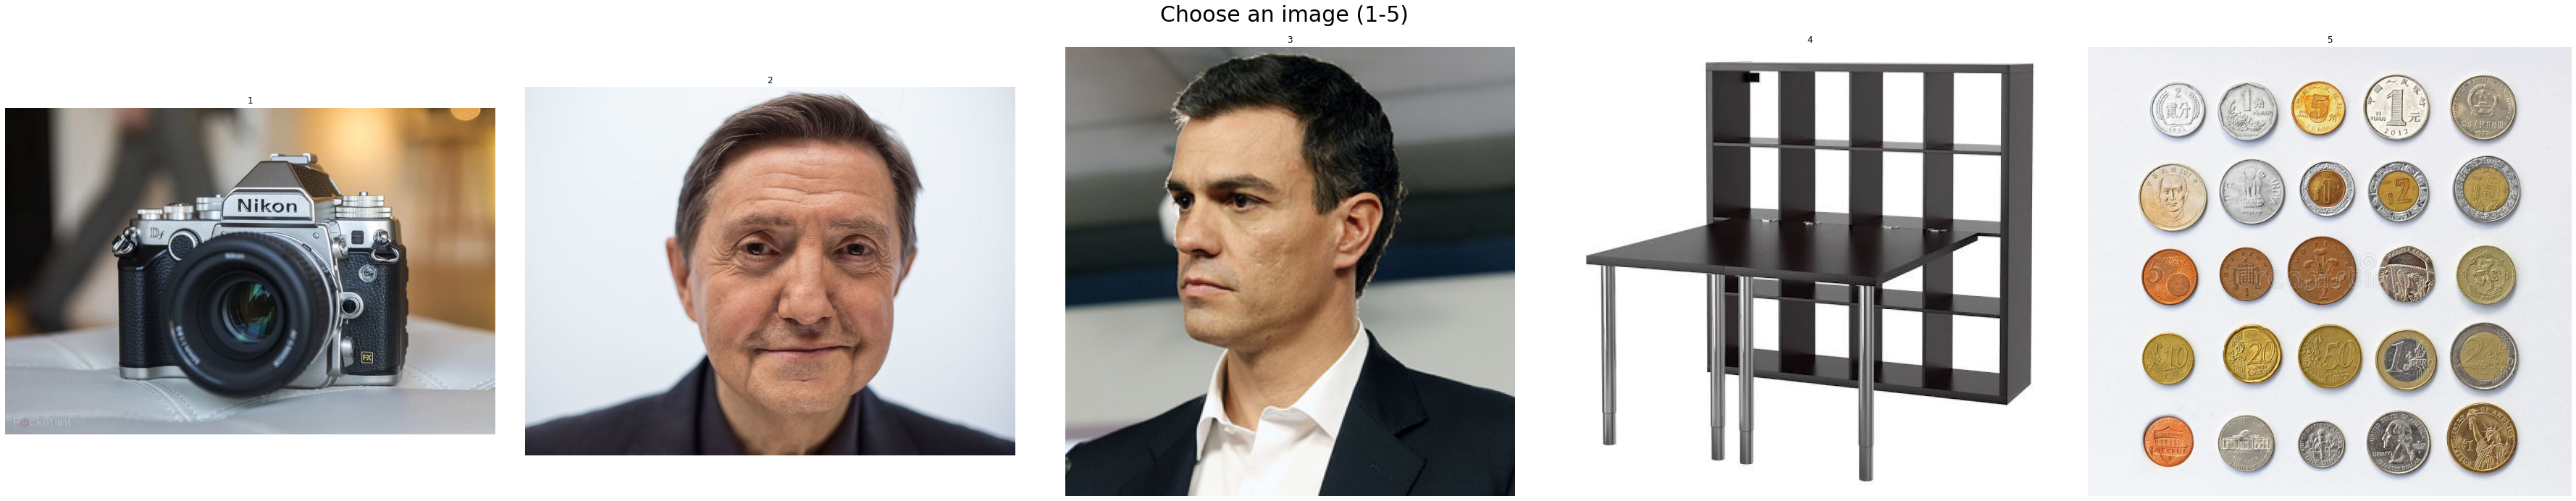

In [6]:
imgs_len = len(_IMGS)

print_n_imgs(imgs=_IMGS,
             titles=[i + 1 for i in range(imgs_len)],
             gray=[False for _ in _IMGS],
             title=f"Choose an image (1-{imgs_len})")

In [7]:
def get_input():
    try:
        n = int(input(f"Image number (1-{imgs_len}). (Default: 1): "))
    except ValueError:
        n = 1
    return n
#n = get_input()
n = 3
_IMG = _IMGS[n - 1]

### CREATE IMAGE ALTERATIONS

In [8]:
def rgb2gray(rgb_img):
    rgb_weights = [0.2989, 0.5870, 0.1140]
    gray_img = np.dot(rgb_img, rgb_weights)
    return gray_img

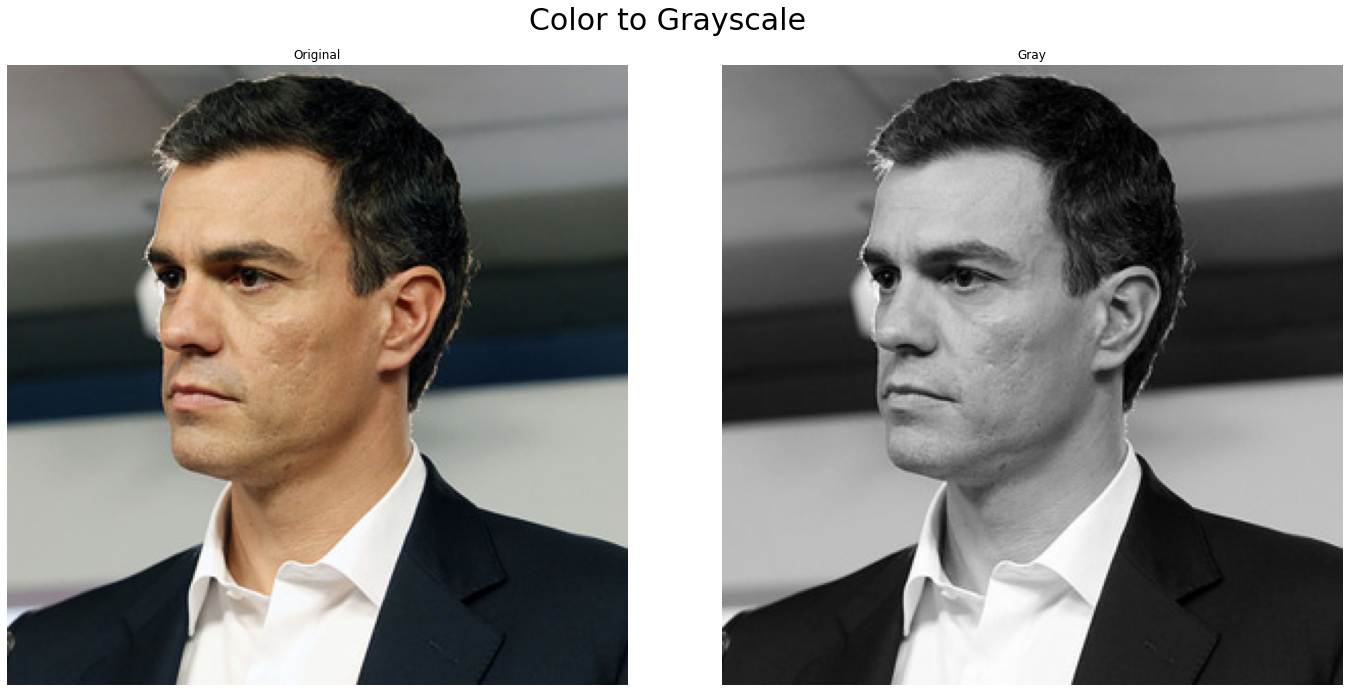

In [9]:
# Color.
img = _IMG

# Grayscale.
gray_img = rgb2gray(img)

print_n_imgs(title="Color to Grayscale", 
             imgs=[img, gray_img],
             titles=["Original", "Gray"], 
             gray=[False, True])

# BORDER DETECTION

---